# Comparison of operations woth OOMMF

In [1]:
import discretisedfield as df
import micromagneticmodel as mm
import oommfc as oc
import numpy as np

Sample

In [2]:
p1=(0, 0, 0)
p2=(4e-9, 1e-9, 1e-9)
cell = (1e-9, 1e-9, 1e-9)

region = df.Region(p1=p1, p2=p2)
mesh = df.Mesh(region=region, cell=cell, bc='neumann') 

Parameters

In [3]:
Ms = 1e6
A = 1e-12
D = 1e-3
K = 1e5
u = (0, 0, 1)
H = (1e6, 0, 0)
mu0 = 4 * np.pi * 1e-7

Magnetisation field

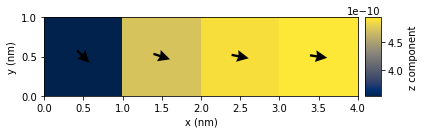

In [4]:
def m_value(point):
    x, y, z = point
    c = 1e9
    return (c*x, -c*y, c*z*x)

M = df.Field(mesh, dim=3, value=m_value, norm=Ms)
m = M.orientation

m.plane('z').mpl()

In [5]:
system = mm.System(name='mysystem')
system.energy = (mm.Exchange(A=A) + mm.DMI(D=D, crystalclass='T') +
                 mm.UniaxialAnisotropy(K=K, u=u) + mm.Zeeman(H=H))
system.m = M

## Zeeman

#### Energy density

In [6]:
wdf = - mu0 * Ms * m @ H
woc = oc.compute(system.energy.zeeman.density, system)
np.allclose(wdf.array, woc.array)

Running OOMMF (ExeOOMMFRunner) [2020/06/04 21:27]... (2.4 s)


True

#### Energy

In [7]:
Edf = (- mu0 * Ms * m @ H).integral
Eoc = oc.compute(system.energy.zeeman.energy, system)
print(f'df: {Edf}')
print(f'oc: {Eoc}')
print(f'rerr: {abs(Edf-Eoc)/Edf * 100} %')

Running OOMMF (ExeOOMMFRunner) [2020/06/04 21:27]... (2.2 s)
df: -4.556968421012632e-21
oc: -4.55696842101e-21
rerr: -5.776548762812023e-11 %


#### Effective field

In [8]:
Hdf = df.Field(mesh, dim=3, value=H)
Hoc = oc.compute(system.energy.zeeman.effective_field, system)
np.allclose(Hdf.array, Hoc.array)

Running OOMMF (ExeOOMMFRunner) [2020/06/04 21:27]... (1.8 s)


True

## Uniaxial anisotropy

#### Energy density

In [9]:
wdf = - K * (m @ u)**2
woc = oc.compute(system.energy.uniaxialanisotropy.density, system)
np.allclose(wdf.array, woc.array)

Running OOMMF (ExeOOMMFRunner) [2020/06/04 21:27]... (2.5 s)


False

#### Energy

In [10]:
Edf = (K * (m @ u)**2).integral
Eoc = oc.compute(system.energy.uniaxialanisotropy.energy, system)
print(f'df: {Edf}')
print(f'oc: {Eoc}')
print(f'rerr: {abs(Edf-Eoc)/Edf * 100} %')

Running OOMMF (ExeOOMMFRunner) [2020/06/04 21:27]... (2.2 s)
df: 8.353846153846153e-41
oc: 4e-22
rerr: 4.788213627992634e+20 %


#### Effective field

In [11]:
Hdf = 2 * K / (mu0 * Ms) * (m @ u)
Hoc = oc.compute(system.energy.uniaxialanisotropy.effective_field, system)
np.allclose(Hdf.array, Hoc.array)

Running OOMMF (ExeOOMMFRunner) [2020/06/04 21:27]... (2.1 s)


False

## Exchange

#### Energy density

In [13]:
wdf = - A * m @ m.laplace
woc = oc.compute(system.energy.exchange.density, system)
np.allclose(wdf.array, woc.array)

Running OOMMF (ExeOOMMFRunner) [2020/06/04 21:27]... (2.0 s)


True

#### Energy

In [14]:
Edf = (- A * m @ m.laplace).integral
Eoc = oc.compute(system.energy.exchange.energy, system)
print(f'df: {Edf}')
print(f'oc: {Eoc}')
print(f'rerr: {abs(Edf-Eoc)/Edf * 100} %')

Running OOMMF (ExeOOMMFRunner) [2020/06/04 21:27]... (1.9 s)
df: 2.2966915816200814e-22
oc: 2.29669158162e-22
rerr: 3.5417994182537243e-12 %


#### Effective field

In [15]:
Hdf = 2 * A / (mu0 * Ms) * m.laplace
Hoc = oc.compute(system.energy.exchange.effective_field, system)
np.allclose(Hdf.array, Hoc.array)

Running OOMMF (ExeOOMMFRunner) [2020/06/04 21:27]... (1.8 s)


True

## DMI

#### Energy density

In [16]:
wdf = D * m @ m.curl
woc = oc.compute(system.energy.dmi.density, system)
np.allclose(wdf.array, woc.array)

Running OOMMF (ExeOOMMFRunner) [2020/06/04 21:27]... (1.8 s)


True

#### Energy

In [17]:
Edf = (D * m @ m.curl).integral
Eoc = oc.compute(system.energy.dmi.energy, system)
print(f'df: {Edf}')
print(f'oc: {Eoc}')
print(f'rerr: {abs(Edf-Eoc)/Edf * 100} %')

Running OOMMF (ExeOOMMFRunner) [2020/06/04 21:27]... (1.8 s)
df: 3.1335917485584463e-31
oc: 3.13359174856e-31
rerr: 4.958175145294178e-11 %


#### Effective field

In [18]:
Hdf = - 2 * D / (mu0 * Ms) * m.curl
Hoc = oc.compute(system.energy.dmi.effective_field, system)
np.allclose(Hdf.array, Hoc.array)

Running OOMMF (ExeOOMMFRunner) [2020/06/04 21:28]... (1.8 s)


False

In [ ]:
Hdf.array

In [ ]:
Hoc.array